### Read data

In [22]:
import pandas as pd 
import scipy.stats as stats
import seaborn as sns

# We also want to plot graphs and histograms
# using matplotlib
import matplotlib.pyplot as plt

dataCondition1 = pd.read_csv('condition1.csv', header=0, names = ['participant number', 'time going forward', 'time going back', 'mistakes made', 'shortcuts taken', 'times wandered away from navigational aid', 'time spent away from navigational aid', 'finished'])  #Reading data where the arrow was the navigational aid
dataCondition1
dataCondition1["condition"] = "Arrow"


In [23]:
dataCondition2 = pd.read_csv('condition2.csv', header=0, names = ['participant number', 'time going forward', 'time going back', 'mistakes made', 'shortcuts taken', 'times wandered away from navigational aid', 'time spent away from navigational aid', 'finished'])  #Reading data where the arrow was the navigational aid
dataCondition2
dataCondition2["condition"] = "NPC"

In [25]:
data = pd.concat([dataCondition1, dataCondition2]).reset_index(drop = True)
data.head(60)

,participant number,time going forward,time going back,mistakes made,shortcuts taken,times wandered away from navigational aid,time spent away from navigational aid,finished,condition
0,jokubas,637.86,453.880000,7,4,13,103.200030,Yes,Arrow
1,test,304.46,322.920000,1,0,1,-1.000000,Left bee,Arrow
2,test0,279.50,171.239990,0,4,0,0.000000,Yes,Arrow
3,mikkel,397.26,667.559940,4,3,1,-1.000000,Left bee,NPC
4,test,124.58,73.560000,0,3,1,-1.000000,Left bee,NPC
5,test1,402.84,317.400000,2,3,2,11.679993,Yes,NPC
6,test2,169.02,111.759995,2,4,1,-1.000000,Left bee,NPC
7,testDaniel,432.90,262.560030,3,4,1,-1.000000,Left bee,NPC


### Looking at the data

Time going forward

Text(0, 0.5, 'Number of participants')

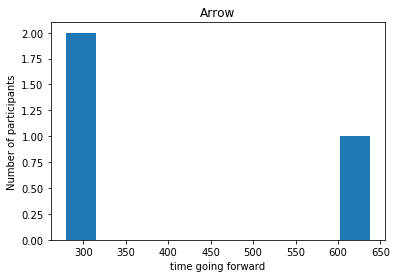

In [26]:
plt.hist(data.loc[data["condition"] == "Arrow", 'time going forward'], bins = 10)
plt.title("Arrow")
plt.xlabel("time going forward")
plt.ylabel("Number of participants")

Text(0, 0.5, 'Number of participants')

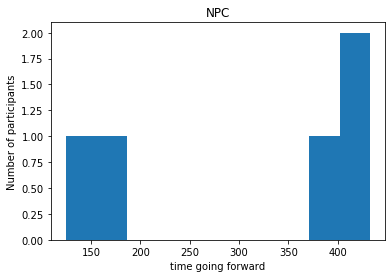

In [27]:
plt.hist(data.loc[data["condition"] == "NPC", 'time going forward'], bins = 10)
plt.title("NPC")
plt.xlabel("time going forward")
plt.ylabel("Number of participants")

Time going back

Text(0, 0.5, 'Number of participants')

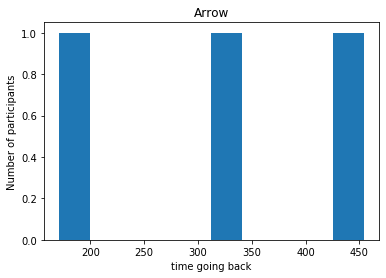

In [28]:
plt.hist(data.loc[data["condition"] == "Arrow", 'time going back'], bins = 10)
plt.title("Arrow")
plt.xlabel("time going back")
plt.ylabel("Number of participants")


Text(0, 0.5, 'Number of participants')

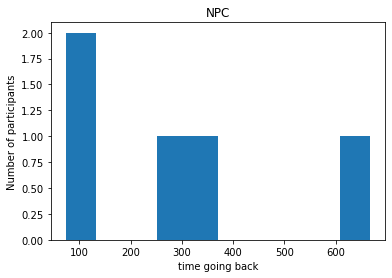

In [29]:
plt.hist(data.loc[data["condition"] == "NPC", 'time going back'], bins = 10)
plt.title("NPC")
plt.xlabel("time going back")
plt.ylabel("Number of participants")


Text(0, 0.5, 'Number of participants')

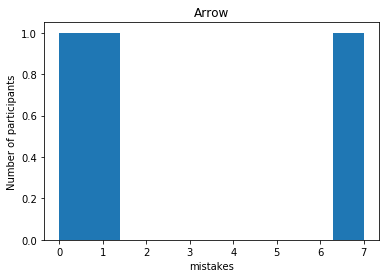

In [30]:
plt.hist(data.loc[data["condition"] == "Arrow", 'mistakes made'], bins = 10)
plt.title("Arrow")
plt.xlabel("mistakes")
plt.ylabel("Number of participants")


Text(0, 0.5, 'Number of participants')

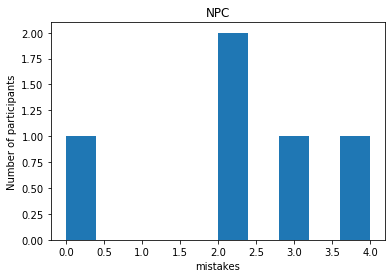

In [31]:
plt.hist(data.loc[data["condition"] == "NPC", 'mistakes made'], bins = 10)
plt.title("NPC")
plt.xlabel("mistakes")
plt.ylabel("Number of participants")


Text(0, 0.5, 'Number of participants')

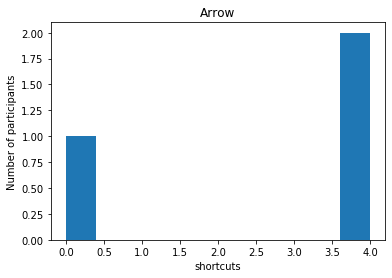

In [32]:
plt.hist(data.loc[data["condition"] == "Arrow", 'shortcuts taken'], bins = 10)
plt.title("Arrow")
plt.xlabel("shortcuts")
plt.ylabel("Number of participants")


Text(0, 0.5, 'Number of participants')

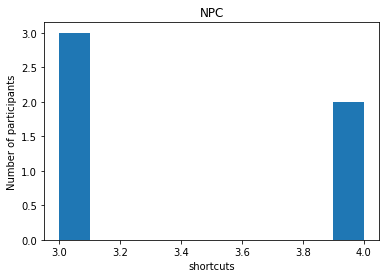

In [33]:
plt.hist(data.loc[data["condition"] == "NPC", 'shortcuts taken'], bins = 10)
plt.title("NPC")
plt.xlabel("shortcuts")
plt.ylabel("Number of participants")

### Descriptive Statistics

In [34]:
arrowMean = data.loc[data["condition"] == "Arrow", 'time going back'].mean()
npcMean = data.loc[data["condition"] == "NPC", 'time going back'].mean()

arrowStd = data.loc[data["condition"] == "Arrow", 'time going back'].std()
npcStd = data.loc[data["condition"] == "NPC", 'time going back'].std()
print(arrowMean)
print(npcMean)
print(arrowStd)
print(npcStd)


316.01333
286.567993
141.4465283457558
235.90893363147794


Find effect size using Cohens d

In [35]:
from numpy import std, mean, sqrt

#correct if the population S.D. is expected to be equal for the two groups.
def cohen_d(x,y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return (mean(x) - mean(y)) / sqrt(((nx-1)*std(x, ddof=1) ** 2 + (ny-1)*std(y, ddof=1) ** 2) / dof)

x = data.loc[data["condition"] == "Arrow", 'time going back']
y = data.loc[data["condition"] == "NPC", 'time going back']
print(x)

#correct only if nx=ny
d = (mean(x) - mean(y)) / sqrt((std(x, ddof=1) ** 2 + std(y, ddof=1) ** 2) / 2.0)
print ("d by the 1st method = " + str(d))
if (len(x) != len(y)):
    print("The first method is incorrect because nx is not equal to ny.")

#correct for more general case including nx !=ny
print ("d by the more general 2nd method = " + str(cohen_d(x,y)))

0    453.88000
1    322.92000
2    171.23999
Name: time going back, dtype: float64
d by the 1st method = 0.15139026226955118
The first method is incorrect because nx is not equal to ny.
d by the more general 2nd method = 0.1407417715086071


If the data is parametric we use independant t-test: ttest_ind

If it is not parametric :( we use: mannwhitneyu

### Comparing presence scores

In [36]:
arrowTime = data.loc[data["condition"] == "Arrow", 'time going back']
npcTime = data.loc[data["condition"] == "NPC", 'time going back']
stats.ttest_ind(arrowTime, npcTime)

Ttest_indResult(statistic=0.19271860759625498, pvalue=0.8535370645461302)

### Boxplot

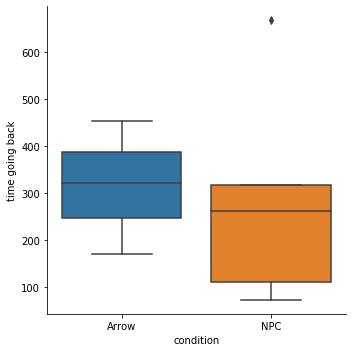

In [37]:
sns.catplot(x = 'condition', y = "time going back", kind = "box", data = data)

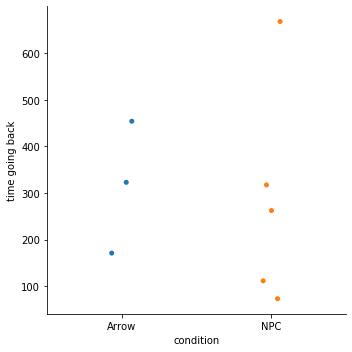

In [38]:
sns.catplot(x = 'condition', y = "time going back", kind = "strip", data = data)

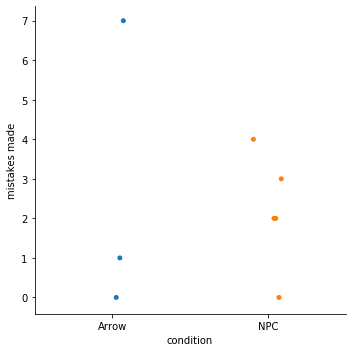

In [39]:
sns.catplot(x = 'condition', y = "mistakes made", kind = "strip", data = data)

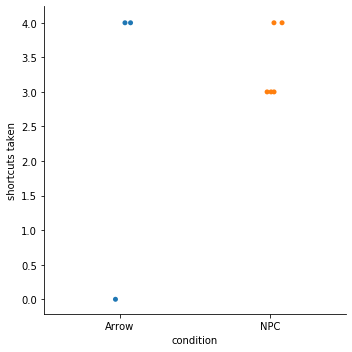

In [40]:
sns.catplot(x = 'condition', y = "shortcuts taken", kind = "strip", data = data)